## Color Quantization
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from histogram_quantization import HistogramQuantization
from median_cut_quantization import MedianCutQuantization
from viz import viz_image

%load_ext autoreload
%autoreload 2

In [2]:
image_name = 'northern_lights'
img = Image.open('images/' + image_name + '.jpg')

# Hyperparameters
n_colors = 16

In [3]:
MCM = MedianCutQuantization(n_colors=n_colors)

In [4]:
mcm_quantized_img = MCM.fit(img)

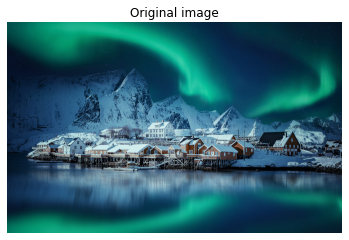

In [5]:
viz_image(img, 'Original image')

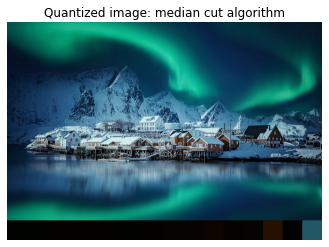

In [7]:
viz_image(mcm_quantized_img, 'Quantized image: median cut algorithm', save=True, img_name='mcm_quantized_' + image_name)